<a href="https://colab.research.google.com/github/Cflalex/CflAlex95/blob/main/%D0%AD%D1%82%D0%B0%D0%BB%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-48db93bd0203>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day['ДВП'] = vapor_pressure_deficit(data_day['Относит влажность воздуха'], data_day['Темпер воздуха '])
<ipython-input-10-48db93bd0203>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_night['ДВП'] = vapor_pressure_deficit(data_night['Относит влажность воздуха'], data_night['Темпер воздуха '])


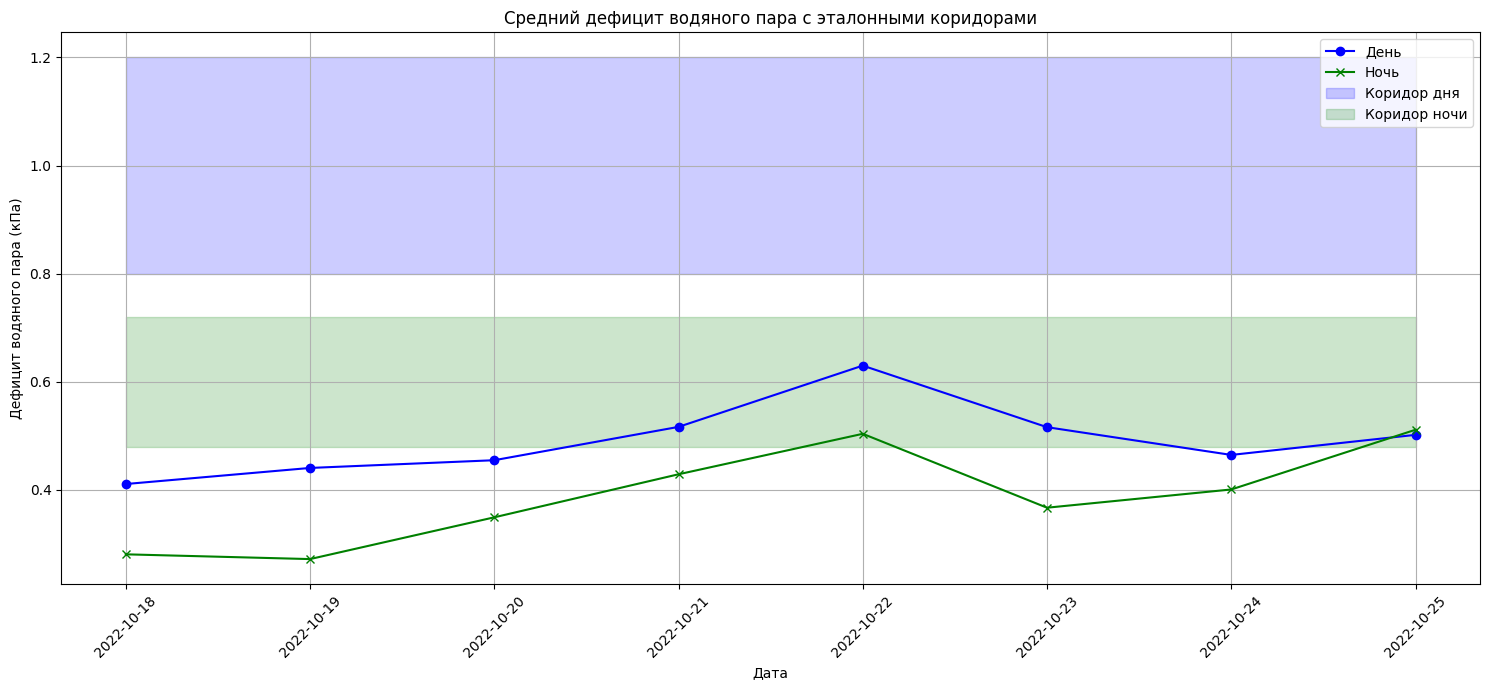

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data_path = "merged_data_with_vlaga5.csv"  # Замените на путь к вашему файлу
data = pd.read_csv(data_path, sep=';', encoding='cp1251')

# Фильтрация данных за февраль
data_feb = data[data['Время суток'].str.startswith('2022-10')]

# Разделение данных на день и ночь
data_day = data_feb[(data_feb['Время суток'].str[-8:] >= '07:00:00') & (data_feb['Время суток'].str[-8:] <= '21:00:00')]
data_night = data_feb[((data_feb['Время суток'].str[-8:] >= '21:00:00') & (data_feb['Время суток'].str[-8:] <= '23:59:59')) |
                      ((data_feb['Время суток'].str[-8:] >= '00:00:00') & (data_feb['Время суток'].str[-8:] <= '07:00:00'))]

# Уравнение Тетенса и расчет ДВП
def tetens_equation(T):
    return 0.6108 * np.exp((17.27 * T) / (T + 237.3))

def vapor_pressure_deficit(relative_humidity, T):
    es = tetens_equation(T)
    return (1 - relative_humidity / 100) * es

data_day['ДВП'] = vapor_pressure_deficit(data_day['Относит влажность воздуха'], data_day['Темпер воздуха '])
data_night['ДВП'] = vapor_pressure_deficit(data_night['Относит влажность воздуха'], data_night['Темпер воздуха '])

# Визуализация среднего ДВП с коридорами
avg_dvp_day = data_day.groupby(data_day['Время суток'].str[:10])['ДВП'].mean()
avg_dvp_night = data_night.groupby(data_night['Время суток'].str[:10])['ДВП'].mean()

day_upper_bound = 1.2
day_lower_bound = 0.8
night_upper_bound = 0.72
night_lower_bound = 0.48

plt.figure(figsize=(15, 7))
avg_dvp_day.plot(label='День', marker='o', color='blue')
avg_dvp_night.plot(label='Ночь', marker='x', color='green')
plt.fill_between(avg_dvp_day.index, day_lower_bound, day_upper_bound, color='blue', alpha=0.2, label='Коридор дня')
plt.fill_between(avg_dvp_night.index, night_lower_bound, night_upper_bound, color='green', alpha=0.2, label='Коридор ночи')
plt.xticks(rotation=45)
plt.title('Средний дефицит водяного пара с эталонными коридорами')
plt.xlabel('Дата')
plt.ylabel('Дефицит водяного пара (кПа)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


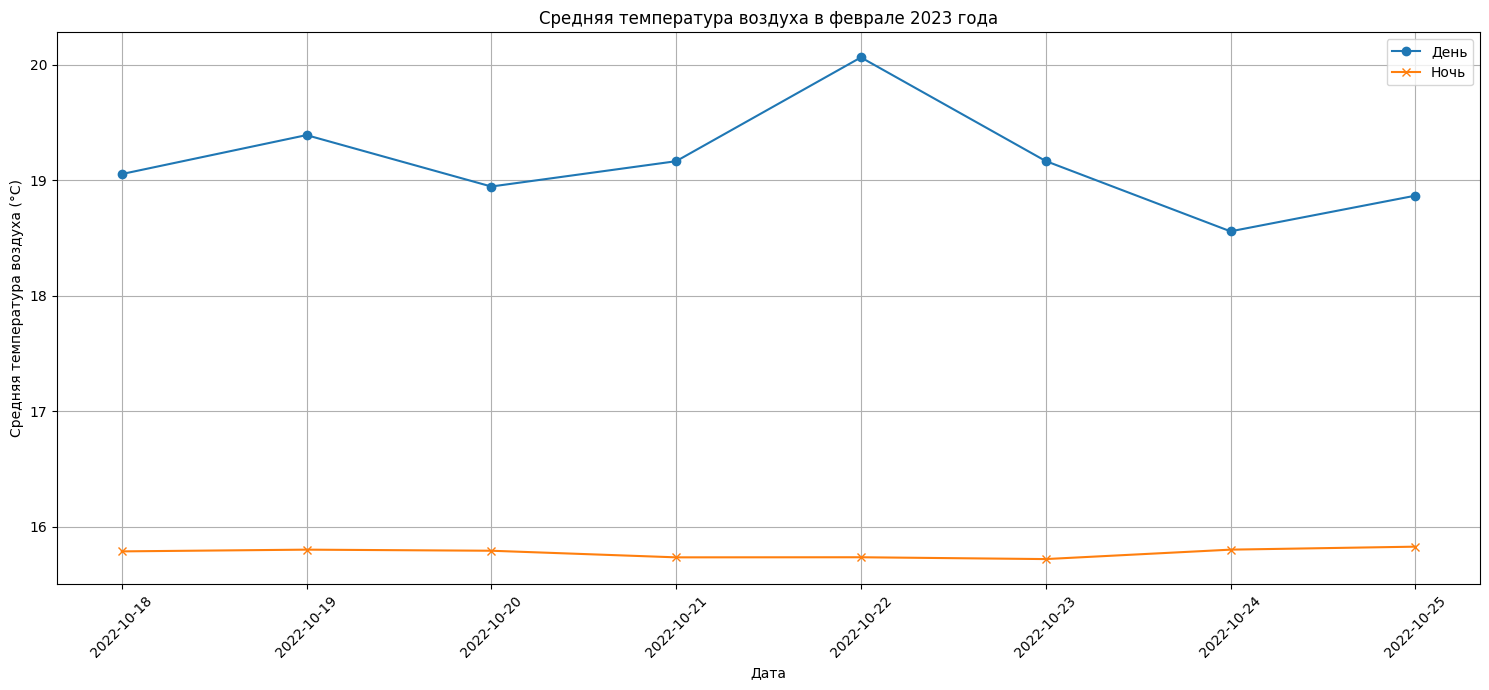

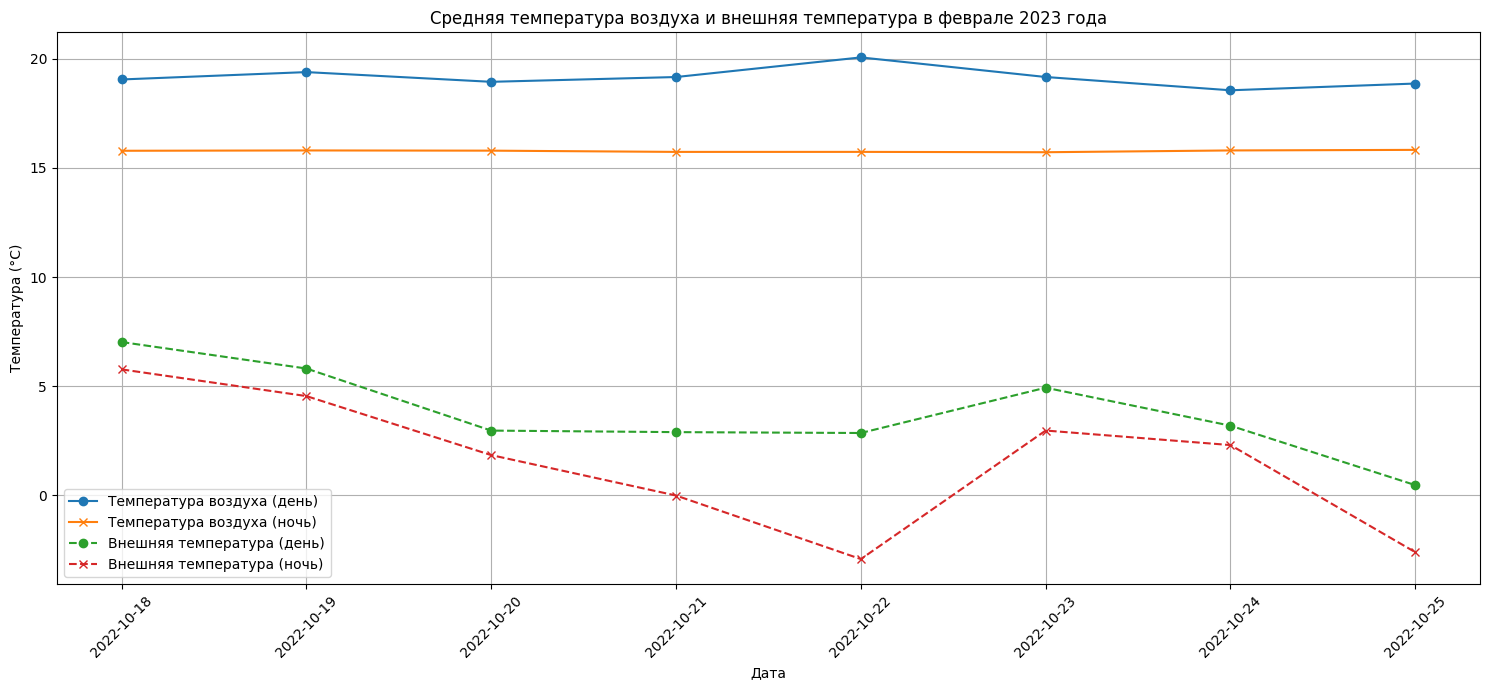

In [ ]:
# Вычисление средней температуры воздуха по дням и ночам с учетом пробела в названии колонки
avg_temp_day = data_day.groupby(data_day['Время суток'].str[:10])['Темпер воздуха '].mean()
avg_temp_night = data_night.groupby(data_night['Время суток'].str[:10])['Темпер воздуха '].mean()

# Визуализация средней температуры воздуха
plt.figure(figsize=(15, 7))
avg_temp_day.plot(label='День', marker='o')
avg_temp_night.plot(label='Ночь', marker='x')
plt.xticks(rotation=45)
plt.title('Средняя температура воздуха в феврале 2023 года')
plt.xlabel('Дата')
plt.ylabel('Средняя температура воздуха (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Вычисление средней внешней температуры по дням и ночам
avg_ext_temp_day = data_day.groupby(data_day['Время суток'].str[:10])['Температура наружная'].mean()
avg_ext_temp_night = data_night.groupby(data_night['Время суток'].str[:10])['Температура наружная'].mean()

# Визуализация средней температуры воздуха и внешней температуры
plt.figure(figsize=(15, 7))
avg_temp_day.plot(label='Температура воздуха (день)', marker='o')
avg_temp_night.plot(label='Температура воздуха (ночь)', marker='x')
avg_ext_temp_day.plot(label='Внешняя температура (день)', linestyle='--', marker='o')
avg_ext_temp_night.plot(label='Внешняя температура (ночь)', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.title('Средняя температура воздуха и внешняя температура в феврале 2023 года')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

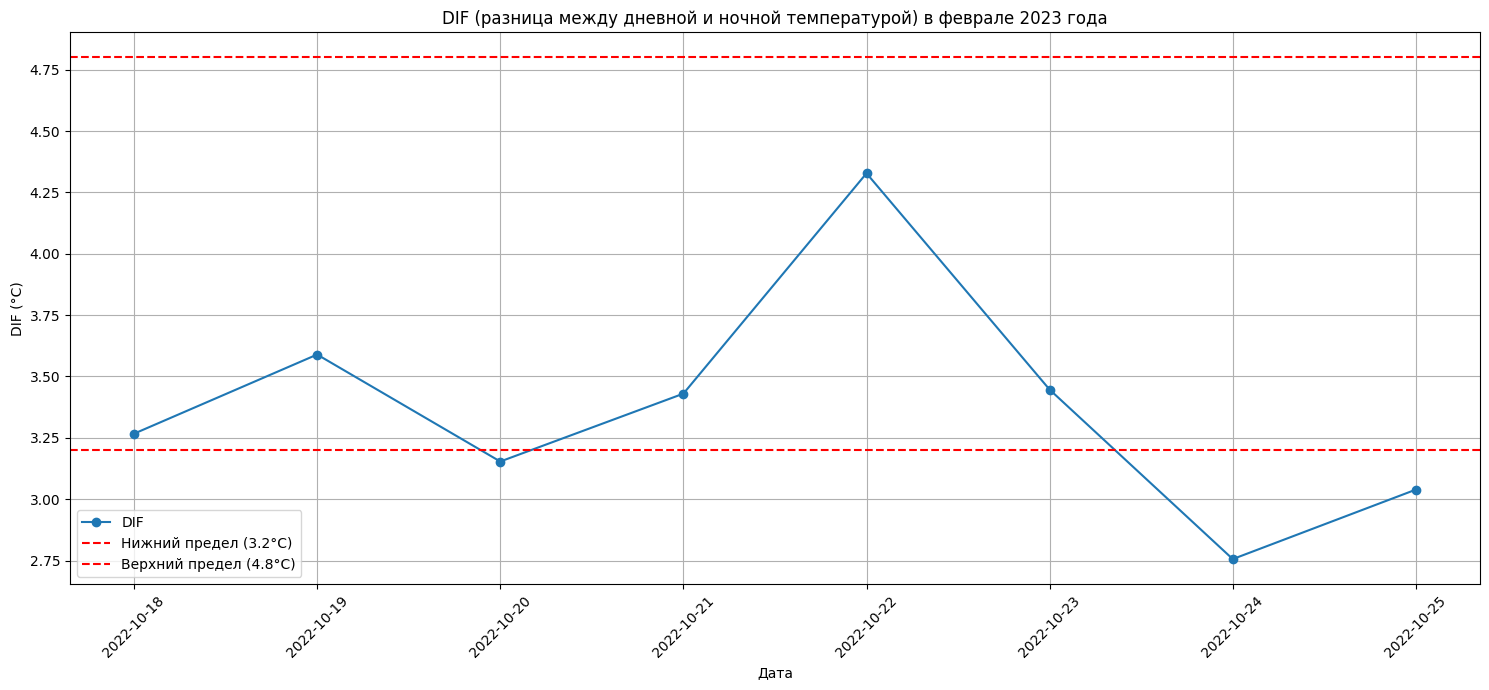

Время суток
2022-10-20    3.153592
2022-10-24    2.756071
2022-10-25    3.039167
Name: Темпер воздуха , dtype: float64

In [ ]:
# Расчет DIF для каждого дня
daily_DIF = avg_temp_day - avg_temp_night

# Определение эталонного коридора для DIF
DIF_lower_bound = 4 * 0.8
DIF_upper_bound = 4 * 1.2

# Определение аномалий для DIF
DIF_anomalies = daily_DIF[(daily_DIF < DIF_lower_bound) | (daily_DIF > DIF_upper_bound)]

# Визуализация DIF и его эталонного коридора
plt.figure(figsize=(15, 7))
daily_DIF.plot(label='DIF', marker='o')
plt.axhline(y=DIF_lower_bound, color='r', linestyle='--', label=f'Нижний предел ({DIF_lower_bound}°C)')
plt.axhline(y=DIF_upper_bound, color='r', linestyle='--', label=f'Верхний предел ({DIF_upper_bound}°C)')
plt.xticks(rotation=45)
plt.title('DIF (разница между дневной и ночной температурой) в феврале 2023 года')
plt.xlabel('Дата')
plt.ylabel('DIF (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

DIF_anomalies


In [ ]:
# Рассчет ДВП для часовых данных
data_feb['Hour'] = data_feb['Время суток'].str[-8:-6].astype(int)
hourly_avg = data_feb.groupby([data_feb['Время суток'].str[:10], 'Hour']).mean().reset_index()

hourly_avg['ДВП'] = vapor_pressure_deficit(hourly_avg['Относит влажность воздуха'], hourly_avg['Темпер воздуха '])


# Определяем эталонные коридоры для каждого часа
hourly_avg['Day_Night'] = np.where((hourly_avg['Hour'] >= 7) & (hourly_avg['Hour'] <= 21), 'Day', 'Night')
hourly_avg['DVP_Lower_Bound'] = np.where(hourly_avg['Day_Night'] == 'Day', 0.8, 0.48)
hourly_avg['DVP_Upper_Bound'] = np.where(hourly_avg['Day_Night'] == 'Day', 1.2, 0.72)

# Определим аномалии
hourly_avg['Anomaly'] = np.where((hourly_avg['ДВП'] < hourly_avg['DVP_Lower_Bound']) |
                                (hourly_avg['ДВП'] > hourly_avg['DVP_Upper_Bound']), 1, 0)

# Подсчитаем количество аномалий за каждый день
anomalies_count = hourly_avg.groupby('Время суток')['Anomaly'].sum()

# Определяем тип аномалии
hourly_avg['Anomaly_Type'] = np.where(hourly_avg['ДВП'] < hourly_avg['DVP_Lower_Bound'], 'Below',
                                     np.where(hourly_avg['ДВП'] > hourly_avg['DVP_Upper_Bound'], 'Above', 'Normal'))

anomalies_count, hourly_avg[hourly_avg['Anomaly'] == 1][['Время суток', 'Hour', 'ДВП', 'DVP_Lower_Bound', 'DVP_Upper_Bound', 'Anomaly_Type']]


<ipython-input-36-836c07b0504f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_feb['Hour'] = data_feb['Время суток'].str[-8:-6].astype(int)
<ipython-input-36-836c07b0504f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_avg = data_feb.groupby([data_feb['Время суток'].str[:10], 'Hour']).mean().reset_index()


(Время суток
 2023-02-01    10
 2023-02-02    12
 2023-02-03     9
 2023-02-04     9
 2023-02-05    10
 2023-02-06     9
 2023-02-07    12
 2023-02-08     9
 2023-02-09    13
 2023-02-10    10
 2023-02-11    11
 2023-02-12    10
 2023-02-13    11
 2023-02-14    12
 2023-02-15    11
 2023-02-16    13
 2023-02-17    14
 2023-02-18    13
 2023-02-19    12
 2023-02-20    11
 2023-02-21    12
 2023-02-22    12
 2023-02-23    12
 2023-02-24    14
 2023-02-25    15
 Name: Anomaly, dtype: int64,
     Время суток  Hour       ДВП  DVP_Lower_Bound  DVP_Upper_Bound Anomaly_Type
 0    2023-02-01     0  1.060392             0.48             0.72        Above
 1    2023-02-01     1  1.051668             0.48             0.72        Above
 2    2023-02-01     2  1.043572             0.48             0.72        Above
 3    2023-02-01     3  1.042433             0.48             0.72        Above
 4    2023-02-01     4  1.023954             0.48             0.72        Above
 5    2023-02-01     5  1.0

In [ ]:
# Отображение всех строк таблицы с аномалиями
anomalies_details = hourly_avg[hourly_avg['Anomaly'] == 1][['Время суток', 'Hour', 'ДВП', 'DVP_Lower_Bound', 'DVP_Upper_Bound', 'Anomaly_Type']]
pd.set_option('display.max_rows', None)
anomalies_details

,Время суток,Hour,ДВП,DVP_Lower_Bound,DVP_Upper_Bound,Anomaly_Type
0,2023-09-02,0,0.787557,0.48,0.72,Above
1,2023-09-02,1,0.839130,0.48,0.72,Above
2,2023-09-02,2,0.809194,0.48,0.72,Above
3,2023-09-02,3,0.748280,0.48,0.72,Above
4,2023-09-02,4,0.825013,0.48,0.72,Above
5,2023-09-02,5,0.453087,0.48,0.72,Below
6,2023-09-02,6,0.452195,0.48,0.72,Below
7,2023-09-02,7,0.507066,0.80,1.20,Below
9,2023-09-02,9,1.711711,0.80,1.20,Above
10,2023-09-02,10,2.176842,0.80,1.20,Above
